# Regresión lineal simple
Es el modelo mas sencillo por ahora, este modela la relación entre dos variables, $Y \sim X$ de manera lineal. El modelos tiene postulados que deben satisfacerse para poder confiar en él, como la correlación entre variables.

En este caso $Y$ posee una aleatoriedad mientras que $X$ no, solo informa las observaciones. 

## Banco de datos
Vamos a trabajar con unos ejemplos.

In [2]:
# librerias
library(ggplot2)

**Datos de Corrosión.** Treinta aleaciones del tipo 90/10 Cu-Ni, cada una con un contenido específico de hierro son estudiadas bajo un proceso de corrosión. Tras un período de 60 días se obtiene la pérdida de peso (en miligramos al cuadrado por decímetro y día) de cada una de las aleaciones debido al proceso de corrosión. El objetivo es estudiar el nivel de corrosión en función del contenido de hierro

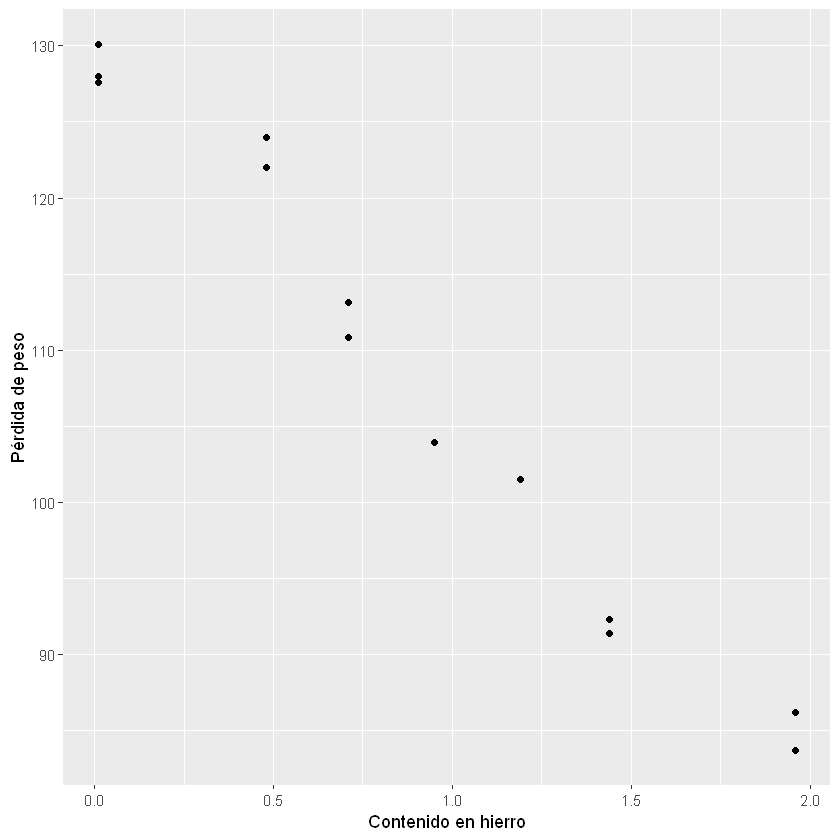

In [3]:
hierro <- c(0.01, 0.48, 0.71, 0.95, 1.19, 0.01, 0.48, 1.44, 0.71, 
            1.96, 0.01, 1.44, 1.96)
peso <- c(127.6, 124, 110.8, 103.9, 101.5, 130.1, 122, 92.3, 113.1, 
          83.7, 128, 91.4, 86.2)
corrosion <- data.frame(hierro,peso)
ggplot(corrosion, aes(x = hierro, y = peso)) +
  geom_point() +
  labs(x = "Contenido en hierro", y = "Pérdida de peso") 

**Datos de Papel**. La relación existente entre la concentración de madera contenida en la pulpa a partir de la que se elabora papel (madera) y la resistencia (tension, en términos de tensión que soporta) del papel resultante. El objetivo del análisis es describir la tendencia observada.

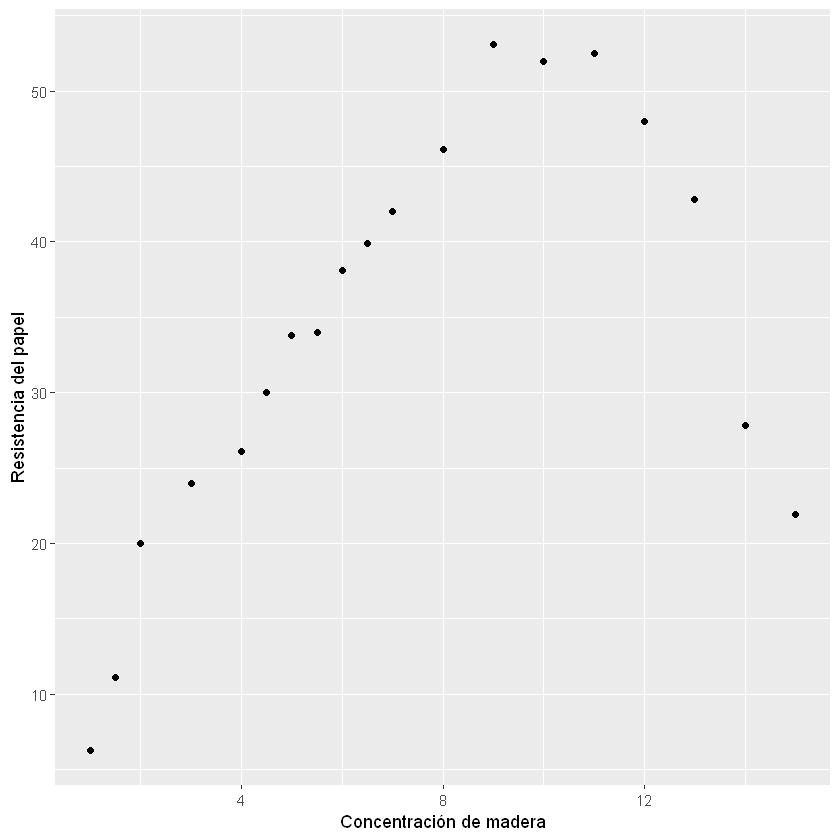

In [4]:
madera <- c(1, 1.5, 2, 3, 4, 4.5, 5, 5.5, 6, 6.5, 7, 8, 9, 10, 11, 
            12, 13, 14, 15)
tension <- c(6.3, 11.1, 20.0, 24, 26.1, 30, 33.8, 34, 38.1, 39.9, 42,
             46.1, 53.1, 52, 52.5, 48, 42.8, 27.8, 21.9)
papel <- data.frame(madera, tension)
ggplot(papel, aes(x = madera, y = tension)) +
  geom_point() +
  labs(x = "Concentración de madera", y = "Resistencia del papel") 

**Datos de Viscosidad.** Se ha realizado un experimento para tratar de conocer la viscosidad de cierto compuesto en función de la cantidad de un tipo der aceite que se usa en su fabricación. Se asume una relación de tipo lineal entre la viscosidad y la cantidad de aceite utilizada.

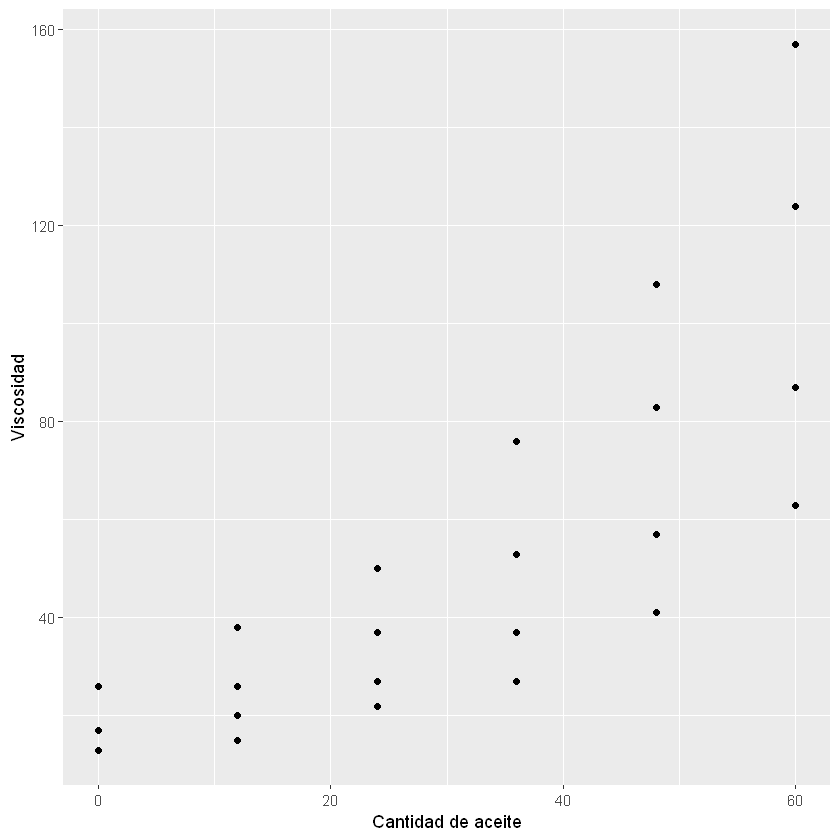

In [5]:
aceite <- c(0, 12, 24, 36, 48, 60, 0, 12, 24, 36, 48, 60, 0, 12, 24,
            36, 48, 60, 12, 24, 36, 48, 60)
viscosidad <- c(26, 38, 50, 76, 108, 157, 17, 26, 37, 53, 83, 124, 13,
                20, 27, 37, 57, 87, 15, 22, 27, 41, 63)
aceites<-data.frame(aceite, viscosidad)
ggplot(aceites, aes(x = aceite, y = viscosidad)) +
  geom_point() +
  labs(x = "Cantidad de aceite", y = "Viscosidad") 

## El modelo de regresion lineal simple
El modelo de una variable de respuesta sobre una predictora  es prediciendo la respuesta media del valor observado $X=x$ con la recta de regresión,

$$E(Y|X=x)=\beta_0+\beta_1 x,$$

Considerando la parte aleatoria como un error esperado, 

$$Y=\beta_0+\beta_1 x+\varepsilon,$$

- Donde $\beta_1$ es la pendiente de la recta de regresión y $\beta_0$ es la ordenada al origen. 
- $\beta_1$ refleja  cuanto varia la respuesta esperada $E(Y).$

Cosideraciones sobre el modelo. Dada una sucesión de valores observados, $(x_i,y_i)_{i=1}^n$, el modelo nos indica que,

$$y_i = \beta_0+\beta_1 x_i+\varepsilon_i,$$
los $\varepsilon_i$ se consideran incorrelacionados de media cero y varianza constante. Detallando, 

- $Corr(\varepsilon_i,\varepsilon_j)=0$ para $i\neq j,$ de esta manera la variable de repuesta $y$, e $y_i$ estan incorrelaacionadas entre si. Los valores de una no afectan las de las otras. 
- $E(\varepsilon_i)=0$ para toda $i.$ De esta menera el modelo solo depende, en valor esperado, de $\beta_0$ y $\beta_1.$ 
- $Var(\varepsilon)=\sigma^2$ es constante, por los que las observaciones $y_i$ sonde la misma población, y la variabilidad respecto a su media está dada por $\sigma^2.$

## Estimación del modelo. 
Nos referimos a calcular los coeficientes $\beta_0$ y $\beta_1$ en la recta de regresión.

- Si solo queremos determinar la recta, basta considerar el cirterio de los *minimos cuadrados*. 
- Si queremos hacer inferencias debemos de hablar del *maximo verosimil*.

### Minimos cuadrados
Tambien conocido por minimizacion del error cuadrático medio. 



### Estimación con R

Para el ajuste máximo verosimil utilizamos la función `lm`, la expresión básica es,

`model <- lm (y ~ x, data = "datos")`

`y` es la variable de repuesta y `x` la predictora. `"datos"` el set de datos. 

- `tidy()` de `tidymodels` nos da el modelo estimado, los erroes de la estimación y las soluciones sobre cada parámetro del modelo.
- `glm_coef()` de `pubh` nos da las estimaciones del modelo, los intervalos de confianza de 95% de cada parámetro y el p-valor de cada unos de los parámetros. 
-`summay` proporciona el resumen del modelo y bondad de ajuste. 

### Ejemplos


In [13]:
#Librerias
library(tidymodels)
library(pubh)
library(sjPlot)

Warning message:
"package 'sjPlot' was built under R version 4.1.3"
Registered S3 method overwritten by 'parameters':
  method                         from      
  format.parameters_distribution datawizard


Attaching package: 'sjPlot'


The following object is masked from 'package:huxtable':

    font_size




In [10]:
# Ajuste del modelo
fit <- lm(peso ~ hierro, data = corrosion)
# Solución con tidy
tidy(fit)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),129.78660,1.402737,92.52385,2.933761e-17
hierro,-24.01989,1.279767,-18.76896,1.055355e-09


In [11]:
# Solución con glm_coef
glm_coef(fit)

Parameter,Coefficient,Pr(>|t|)
<chr>,<chr>,<chr>
(Intercept),"129.79 (126.7, 132.87)",< 0.001
hierro,"-24.02 (-26.84, -21.2)",< 0.001


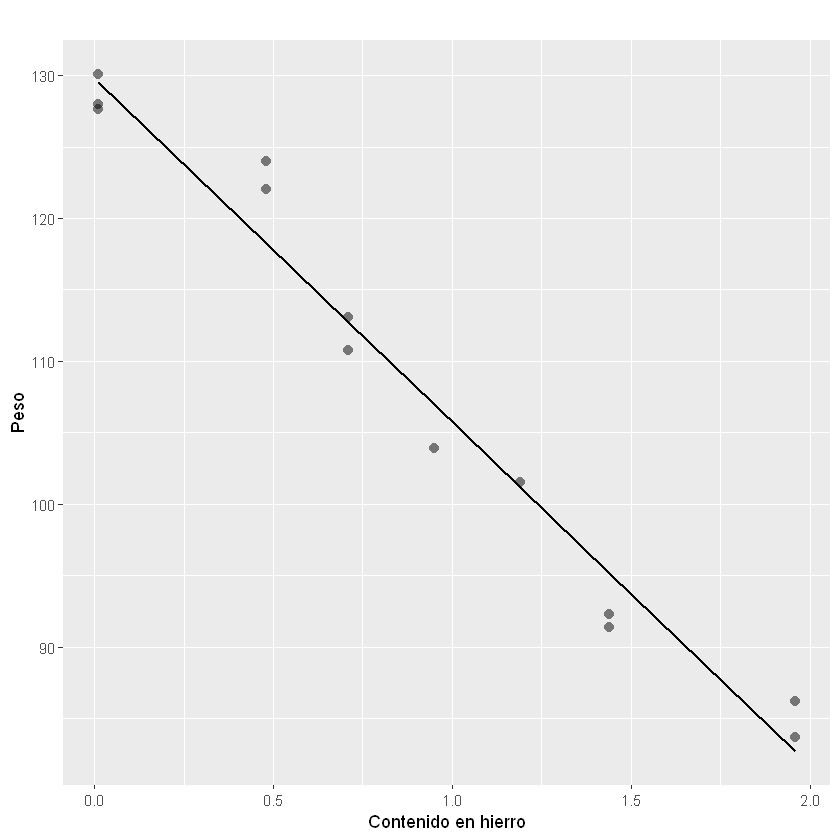

In [14]:
# Gráfico del ajuste
plot_model(fit,"pred", terms = ~hierro, 
                ci.lvl = NA, 
                show.data = TRUE, 
                axis.title = c("Contenido en hierro", "Peso"),
                title = " ")